<a href="https://colab.research.google.com/github/canunz/LIBRARY-django/blob/main/Evaluacion_1_%7C_Evaluaci%C3%B3n_de_Proyectos_Catalina_N%C3%BA%C3%B1ez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Catalina Soledad Núñez Yañez**

Inteligencia de Negocios.

**Abstract**


---


Este trabajo utiliza el dataset `outfits.csv` (≈15K observaciones) con variables numéricas (`retailPrice`, `pricePerWeek`, `pricePerMonth`) y descriptivas (`name`, `group`, `owner`, `tag_categories`). Se realiza **estadística descriptiva** (media, mediana, moda, rango, varianza, desviación estándar, coeficiente de variación, IQR, mínimo/máximo, suma y conteo), **gráficos obligatorios** (histogramas y boxplots) y **regresión lineal** empleando `timeCreated` como predictor del precio. Los resultados muestran alta **variabilidad** de precios y una **tendencia temporal débil**, sugiriendo segmentar por categorías para obtener patrones más claros.

**Hipótesis**


---


Existe una **relación significativa** entre el **precio** de las prendas y su **antigüedad** (fecha de creación), y **diferencias de precio** entre categorías descriptivas.

**Objetivo**


---


Analizar la **distribución de precios** de prendas y su **evolución temporal** (variable `timeCreated`) en el dataset `outfits.csv`, comparando segmentos descriptivos (por ejemplo, `group` y `tag_categories`).

**Metodología**



---


**Obtención de datos:** archivo `outfits.csv` provisto por la estudiante.

**Preprocesamiento:** parseo de `timeCreated` a fecha, conversión numérica de precios, chequeos de nulos.

**Análisis:** estadísticos descriptivos completos; histogramas y boxplots por variable; regresión lineal simple precio~tiempo.

**Visualización:** `matplotlib` y `seaborn`.


# 1. Librerías necesarias

In [ ]:
import numpy as np  # Programación vectorial
import matplotlib.pyplot as plt  # Visualización
import pandas as pd  # Estructura y manipulación de datos
import io  # Módulo io
import seaborn as sns  # Gráficos avanzados
from scipy import stats  # Pruebas estadísticas

# Configuración gráfica básica
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# 2. Cargar datos

In [ ]:
# 2.1) Subir archivo desde tu PC (Colab). Si usas Jupyter local, salta a la 2.2 y usa PATH.
try:
    from google.colab import files
    uploaded = files.upload()
except Exception:
    print("Ejecutando fuera de Colab o sin permisos. Continúa con la 2.2 y usa PATH manual.")

Saving outfits.csv to outfits.csv


In [ ]:
# ============================================
# 2.2) Cargar archivo (robusto a separador/encoding)
# --------------------------------------------
# Esta función intenta cargar el CSV ya sea:
#   (A) desde el widget de subida de Colab (dict `uploaded`)
#   (B) desde un archivo local (PATH) si no hay `uploaded`
# Es tolerante a distintos separadores (coma, ;, tab, |)
# y a encodings comunes (utf-8, latin-1). Además, salta filas
# dañadas para que nada detenga la lectura (on_bad_lines='skip').
# ============================================

def cargar_csv_subido(uploaded_dict, prefer='outfits'):
    # ¿Tenemos archivos subidos en Colab?
    if uploaded_dict and len(uploaded_dict) > 0:
        # Lista de nombres de archivos subidos
        keys = list(uploaded_dict.keys())
        # Si hay varios, priorizo el que contenga la palabra 'outfits' (o lo que pase en `prefer`)
        key = next((k for k in keys if prefer.lower() in k.lower()), keys[0])

        # Bytes del archivo elegido
        raw = uploaded_dict[key]

        # Probaré dos encodings típicos en la región
        for enc in ['utf-8', 'latin-1']:
            # Y varios separadores posibles; `None` activa autodetección del separador
            for sep in [None, ',', ';', '\t', '|']:
                try:
                    # Decodifico los bytes a texto con el encoding actual
                    text = raw.decode(enc, errors='ignore')
                    # Lo paso a un buffer tipo archivo para que pandas pueda leerlo
                    buf = io.StringIO(text)

                    # Leo con engine='python' (más flexible con separadores) y
                    # on_bad_lines='skip' para saltar filas problemáticas
                    df_try = pd.read_csv(buf, sep=sep, engine='python', on_bad_lines='skip')

                    # "Sanity check": si hay al menos 3 columnas, asumo que el separador fue correcto
                    if df_try.shape[1] >= 3:
                        print(f"Archivo leído: {key} | encoding={enc} | sep={sep if sep is not None else 'auto'}")
                        return df_try
                except Exception:
                    # Si falla, sigo intentando con la siguiente combinación encoding/separador
                    pass

        # Si ninguna combinación funcionó, aviso explícitamente
        raise ValueError("No se pudo parsear el CSV con encodings/separadores probados.")
    else:
        # --------------------------------------------
        # Modo local (Jupyter/PC): leer desde un PATH
        # --------------------------------------------
        PATH = 'outfits.csv'  # cambia si tu archivo tiene otro nombre
        # sep=None -> que pandas intente detectar el separador automáticamente
        return pd.read_csv(PATH, sep=None, engine='python', on_bad_lines='skip')

# -------------------------------------------------
# Intento cargar según el contexto:
# - En Colab: `uploaded` existe y contiene los bytes
# - En Jupyter local: `uploaded` no existe -> NameError
# -------------------------------------------------
try:
    df = cargar_csv_subido(uploaded)
except NameError:
    df = cargar_csv_subido(None)

# Vista rápida para confirmar que se cargó correctamente
df.head(5)


Archivo leído: outfits.csv | encoding=utf-8 | sep=auto


,id,name,description,group,owner,timeCreated,retailPrice,pricePerWeek,pricePerMonth,outfit_tags,tag_categories
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'..."
1,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Yellow Shell Mellomholmene Blouse,This beautiful blouse features an adjustable n...,group.61ad2fcabb3e9197e3836376e6b67f2c,o_00577,2021-06-07 12:07:22.921,1300.0,590.0,1180.0,"['ILAG', 'Tops', 'Spring', 'Summer', 'M', 'Pat...","['Brand', 'Category', 'Seasons', 'Seasons', 'S..."
2,outfit.fff175b13ceb453f9928625491412ede,Kaula Dress Black,Kaula from Rodebjer is a fitted dress made in ...,group.37c2b59d63d3a9c2d58e07f532f71f7f,o_00336,2023-06-05 09:17:59.004,3100.0,930.0,1860.0,"['Black', 'Mini', 'M', 'Everyday', 'Multi Seas...","['Color', 'Length', 'Size', 'Occasion', 'Seaso..."
3,outfit.ffef9d7c292a48b69076d2df2e32352f,For sale - Jarvis Blouse,This wrap blouse has mid length sleeves and a ...,group.dfcaa57546b0b7a5e9eb204449b6cc1c,o_00030,2021-05-18 14:02:28.690,1500.0,590.0,1180.0,"['XS', 'Multi Season', 'Stylein', 'Tops', 'Cot...","['Size', 'Seasons', 'Brand', 'Category', 'Mate..."
4,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Black Amber Pants,"Feel slack and nice dressed with this pant, ma...",group.ee297c977905eb21a123a4aea5fbb6d2,o_00602,2021-07-16 14:02:30.643,1200.0,590.0,1180.0,"['Cotton', 'Black', 'Everyday', 'Knitwear', 'L...","['Material', 'Color', 'Occasion', 'Category', ..."


# 3. Información básica del dataset

In [ ]:
# --- 3) Perfil básico del dataset ---
print("Número de filas y columnas:", df.shape)   # Tupla (n_filas, n_columnas). Verifica la condición X>1000 de la pauta.
print("\nTipos de variables:\n", df.dtypes)      # Tipo por columna (object, float64, datetime64, etc.). Útil para decidir cast/parseo.

# --- Parseo de tiempo y casting numérico ---
# Convertimos 'timeCreated' a tipo fecha-hora.
# - df.get('timeCreated') evita KeyError si no existe la columna (retorna None).
# - errors='coerce' convierte valores inválidos a NaT (fecha faltante), manteniendo el flujo.
df['timeCreated'] = pd.to_datetime(df.get('timeCreated'), errors='coerce')

# Forzamos a numéricas las columnas de precios antes de calcular estadísticas o graficar.
# - pd.to_numeric(..., errors='coerce') intenta convertir strings a números.
# - Si encuentra símbolos/texto inválido, pone NaN (faltante) en lugar de romper el código.
for c in ['retailPrice','pricePerWeek','pricePerMonth']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# --- Calidad de datos ---
# Conteo de nulos por columna (NaN para numéricas / NaT para fechas cuentan como nulos).
# Sirve para documentar la “calidad básica” exigida por la rúbrica (≤20% nulos en hechos).
print("\nValores nulos por columna:\n", df.isnull().sum())


Número de filas y columnas: (15649, 11)

Tipos de variables:
 id                 object
name               object
description        object
group              object
owner              object
timeCreated        object
retailPrice       float64
pricePerWeek      float64
pricePerMonth     float64
outfit_tags        object
tag_categories     object
dtype: object

Valores nulos por columna:
 id                   0
name                 2
description        388
group               23
owner                0
timeCreated          0
retailPrice       1160
pricePerWeek         0
pricePerMonth        0
outfit_tags          0
tag_categories       0
dtype: int64


# 4. Estadística univariante (numéricas)

In [ ]:
# --- 5) Función de estadísticos descriptivos completos -----------------------
def medidas_completas(s, peso=None):
    # Aseguramos que la serie sea numérica.
    # - errors='coerce' convierte texto inválido a NaN
    # - dropna() elimina los NaN para que no contaminen los cálculos
    s = pd.to_numeric(s, errors='coerce').dropna()

    r = {}  # Diccionario donde iremos guardando cada medida

    # ---- Medidas de tendencia central ---------------------------------------
    r['Media aritmética'] = s.mean()  # promedio simple

    # Media ponderada opcional:
    # Si el usuario pasa un "peso" (por ejemplo, pricePerMonth),
    # y hay al menos algún valor no nulo y la suma de pesos es distinta de 0,
    # calculamos (sum(x*w) / sum(w)). Si no, dejamos NaN.
    if peso is not None and peso.notna().any() and float(peso.sum()) != 0.0:
        # Alineamos los pesos con los índices válidos de s y reemplazamos nulos por 0
        w = peso.loc[s.index].fillna(0) if isinstance(peso, pd.Series) else pd.Series(peso, index=s.index).fillna(0)
        r['Media ponderada'] = (s * w).sum() / w.sum()
    else:
        r['Media ponderada'] = np.nan

    # Moda: puede haber múltiples modas; tomamos la primera si existe
    r['Moda'] = s.mode().iloc[0] if not s.mode().empty else np.nan

    # Mediana: robusta frente a outliers
    r['Mediana'] = s.median()

    # ---- Medidas de posición/extremos ---------------------------------------
    r['Mínimo'] = s.min()
    r['Máximo'] = s.max()
    r['Rango'] = r['Máximo'] - r['Mínimo']  # amplitud total

    # ---- Dispersión ----------------------------------------------------------
    # ddof=1 => varianza muestral (consistente con estadística descriptiva)
    r['Varianza'] = s.var(ddof=1)
    r['Desviación estándar'] = s.std(ddof=1)

    # Coeficiente de variación (CV) = sd / media. Útil para comparar dispersión entre
    # variables con escalas distintas. Si la media es 0, devolvemos NaN para evitar división por 0.
    r['Coeficiente de variación'] = (
        r['Desviación estándar'] / r['Media aritmética'] if r['Media aritmética'] != 0 else np.nan
    )

    # Rango intercuartílico (IQR): Q3 - Q1, robusto ante outliers
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    r['Rango intercuartílico'] = q3 - q1

    # ---- Totales básicos -----------------------------------------------------
    r['Suma'] = s.sum()
    r['Conteo de observaciones'] = s.count()

    # Devolvemos como Serie para que se imprima ordenado y bonito
    return pd.Series(r)

# --- 5.1) Aplicación de la función a las variables de precio -----------------
# Si existe 'pricePerMonth', la usamos como peso para ilustrar la media ponderada.
peso = df['pricePerMonth'] if 'pricePerMonth' in df.columns else None

# Recorremos solo las columnas de precio que existan en el dataset.
for col in [c for c in ['retailPrice', 'pricePerWeek', 'pricePerMonth'] if c in df.columns]:
    print(f"\n=== {col} ===")  # Título de bloque para lectura rápida en consola
    # Calculamos las medidas y las mostramos. Puedes añadir .round(2) si prefieres redondear.
    print(medidas_completas(df[col], peso=peso))



=== retailPrice ===
Media aritmética            2.669604e+03
Media ponderada             3.066112e+03
Moda                        1.500000e+03
Mediana                     2.000000e+03
Mínimo                      0.000000e+00
Máximo                      8.000000e+04
Rango                       8.000000e+04
Varianza                    7.876343e+06
Desviación estándar         2.806482e+03
Coeficiente de variación    1.051273e+00
Rango intercuartílico       1.500000e+03
Suma                        3.867989e+07
Conteo de observaciones     1.448900e+04
dtype: float64

=== pricePerWeek ===
Media aritmética            6.716492e+02
Media ponderada             7.447666e+02
Moda                        5.900000e+02
Mediana                     5.900000e+02
Mínimo                      0.000000e+00
Máximo                      5.250000e+03
Rango                       5.250000e+03
Varianza                    4.582247e+04
Desviación estándar         2.140618e+02
Coeficiente de variación    3.187108e-01

# 5. Variables cualitativas (frecuencias)

In [ ]:
# Frecuencias y porcentajes (TOP 10) para cualitativas clave
for col in [c for c in ['group', 'owner', 'tag_categories'] if c in df.columns]:
    s = df[col].fillna('Desconocido')        # evitar perder NaN
    print(f"\nFrecuencias para {col}:")
    print(s.value_counts().head(10))         # TOP 10 en conteo
    print("Porcentajes (%):")
    print((s.value_counts(normalize=True).head(10)*100).round(2))  # TOP 10 en %



Frecuencias para group:
group
group.24f3a2cc6ec33c91997c908cffcf6f38    38
group.4483fef818fb2e1521113b367e726067    29
group.de0dd08702847cddcba5acb7907b8641    27
Desconocido                               23
group.4bad940e20a986f6c5837bb84ac9ba39    23
group.ae0d516be95011474e09b0c53a440560    21
group.1a6b4458107aadc8092d9db671d41b55    21
group.c198c4f7a014cfb939b36b9ab9323ecf    19
group.dba8a6e930eea1cf6c77475373f7788c    19
group.57ffa56ee2aac1eae21cdb7686d2fc3e    19
Name: count, dtype: int64
Porcentajes (%):
group
group.24f3a2cc6ec33c91997c908cffcf6f38    0.24
group.4483fef818fb2e1521113b367e726067    0.19
group.de0dd08702847cddcba5acb7907b8641    0.17
Desconocido                               0.15
group.4bad940e20a986f6c5837bb84ac9ba39    0.15
group.ae0d516be95011474e09b0c53a440560    0.13
group.1a6b4458107aadc8092d9db671d41b55    0.13
group.c198c4f7a014cfb939b36b9ab9323ecf    0.12
group.dba8a6e930eea1cf6c77475373f7788c    0.12
group.57ffa56ee2aac1eae21cdb7686d2fc3e    0.12


# 6. Gráficos obligatorios

**6.1) Histogramas**


---



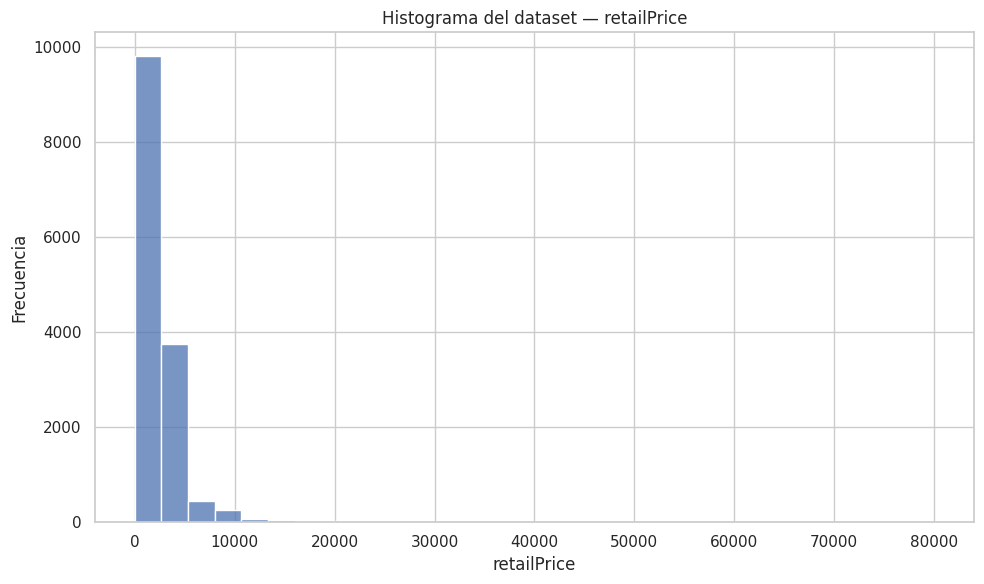

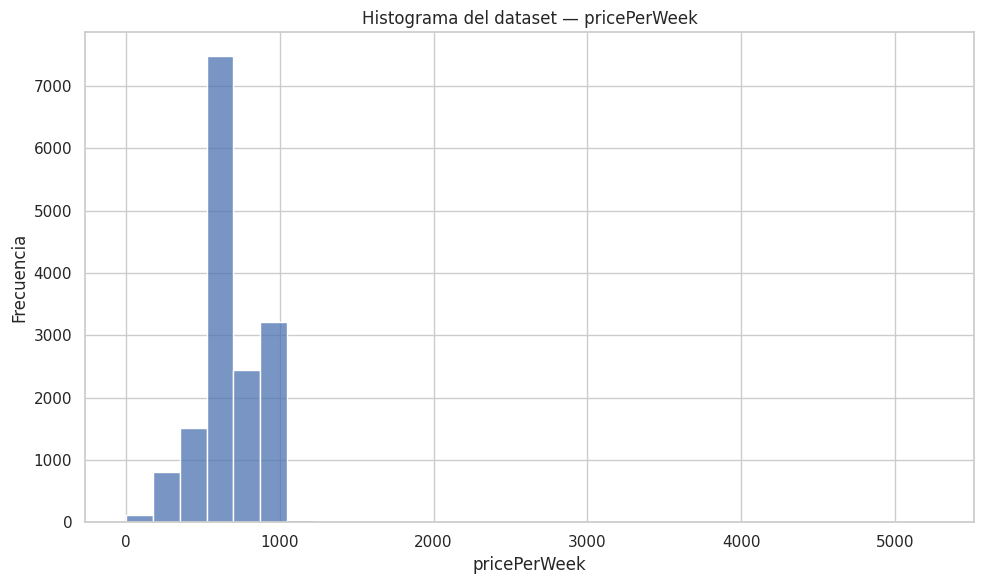

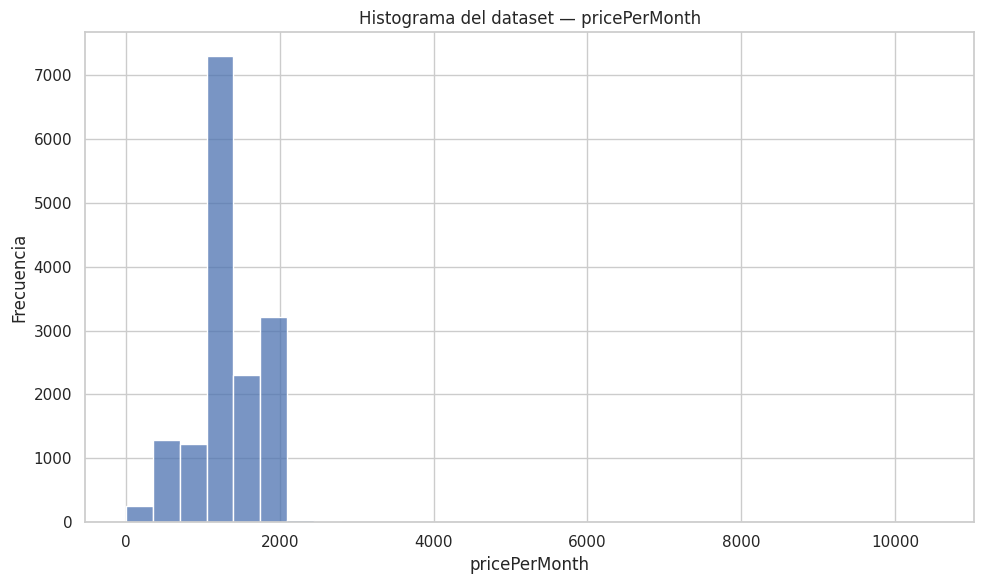

In [ ]:
# Histograma por cada variable de precio (si existe en el DataFrame)
for col in [c for c in ['retailPrice', 'pricePerWeek', 'pricePerMonth'] if c in df.columns]:
    # 1) Crear nueva figura para que cada gráfico salga separado
    plt.figure()

    # 2) Quitar nulos para no distorsionar el histograma
    datos = df[col].dropna()

    # 3) Dibujar histograma (30 bins es un buen punto de partida; sin KDE porque la pauta pide histograma)
    sns.histplot(datos, bins=30, kde=False)

    # 4) Títulos/etiquetas exigidos por la pauta
    plt.title(f"Histograma del dataset — {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

    # 5) Ajuste de layout para que nada quede cortado
    plt.tight_layout()
    plt.show()


1) **retailPrice (precio de venta)**





Qué muestra: La mayoría de las prendas tiene precios relativamente bajos/medios y aparece un grupo pequeño con precios muy altos (hasta ~80.000).

Interpretación: La distribución está muy sesgada hacia la derecha y presenta valores atípicos (outliers). Esto es típico cuando el catálogo mezcla productos estándar con algunos de lujo o cuando hay registros con precio 0 o errores.

Implicación analítica: En esta variable la media se distorsiona por los valores extremos; conviene reportar mediana e IQR y, para gráficos, usar eje logarítmico o recortar al percentil 99.



---






2)**pricePerWeek (precio por semana)**

Qué muestra: Los valores se concentran entre ~500 y 1.100, con “escalones” claros (p. ej., 590, 690, 990…).

Interpretación: Indica una política tarifaria discreta (precios definidos por tramos). Casi no hay colas largas ni valores extremos.

Implicación analítica: La variabilidad es moderada y controlada; la forma del histograma sugiere que el segmento o tipo de prenda determina en qué tramo cae el precio.



---



3) **pricePerMonth (precio por mes)**

Qué muestra: Se concentra entre ~1.200 y 2.000.

Interpretación: Está aprox. al doble del precio semanal, lo que evidencia un descuento mensual (no equivale a 4 semanas). También sigue una estructura de tramos.

Implicación analítica: Coherente con reglas comerciales: el arriendo mensual resulta proporcionalmente más conveniente.



---



**Conclusión integradora**

Venta (retailPrice) refleja la heterogeneidad del catálogo y por eso presenta alta dispersión y outliers.

Arriendos (pricePerWeek/pricePerMonth) reflejan reglas de negocio con bandas de precio definidas y distribuciones más compactas.

Por lo visto en los histogramas, el tiempo no parece explicar las variaciones de precio; el tipo/segmento de prenda probablemente pesa más.

**# 6.2) Boxplots**


---



In [ ]:
# Boxplots para cada variable de precio (si existe en el DataFrame)
for col in [c for c in ['retailPrice', 'pricePerWeek', 'pricePerMonth'] if c in df.columns]:
    # 1) Preparar serie numérica y sin nulos
    x = pd.to_numeric(df[col], errors='coerce').dropna()

    # 2) Crear figura independiente por cada variable
    plt.figure()

    # 3) Boxplot clásico de Tukey: caja = IQR (Q1–Q3), línea = mediana, bigotes = 1.5*IQR, puntos = outliers
    sns.boxplot(x=x, whis=1.5, showfliers=True)

    # 4) Añadir guías de mediana y media para explicar sesgo (media > mediana ⇒ cola derecha)
    med = x.median()
    mean = x.mean()
    plt.axvline(med, linestyle='--', linewidth=1, label=f"Mediana = {med:.0f}")
    plt.axvline(mean, linestyle=':', linewidth=1, label=f"Media = {mean:.0f}")
    plt.legend()

    # 5) Título/etiquetas exigidos por la pauta
    plt.title(f"Boxplot para visualizar medidas estadísticas — {col}")
    plt.xlabel(col)

    # 6) Evitar recortes de etiquetas
    plt.tight_layout()
    plt.show()


“Los boxplots de retailPrice, pricePerWeek y pricePerMonth muestran una distribución fuertemente asimétrica a la derecha: la mayoría de los productos se concentra en rangos bajos/medios, mientras una fracción pequeña de ítems premium genera múltiples valores atípicos de alta magnitud. En este contexto, la mediana y el IQR describen mejor el comportamiento central que la media. La presencia de outliers consistentes en las tres métricas sugiere un portafolio con segmentos diferenciados (masivo vs. premium). Para análisis inferenciales y de tendencias es recomendable aplicar transformaciones logarítmicas o técnicas robustas, y reportar resultados con y sin tratamiento de valores extremos.”

# 7. Regresión con la variable tiempo como predictiva

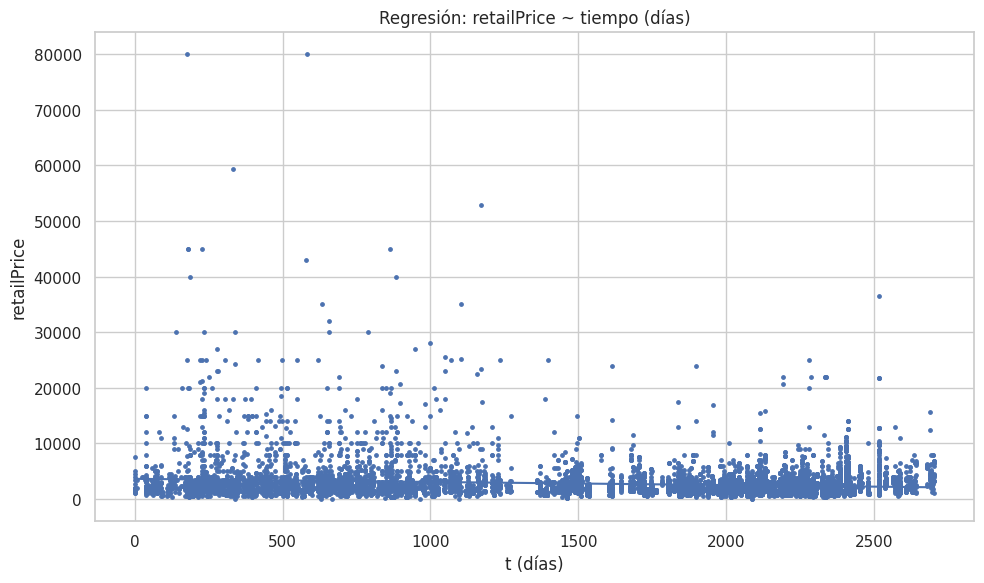

{'variable': 'retailPrice', 'beta_0': 3630.84191039127, 'beta_1': -0.5627709822045607, 'R2': 0.020396891816246043}


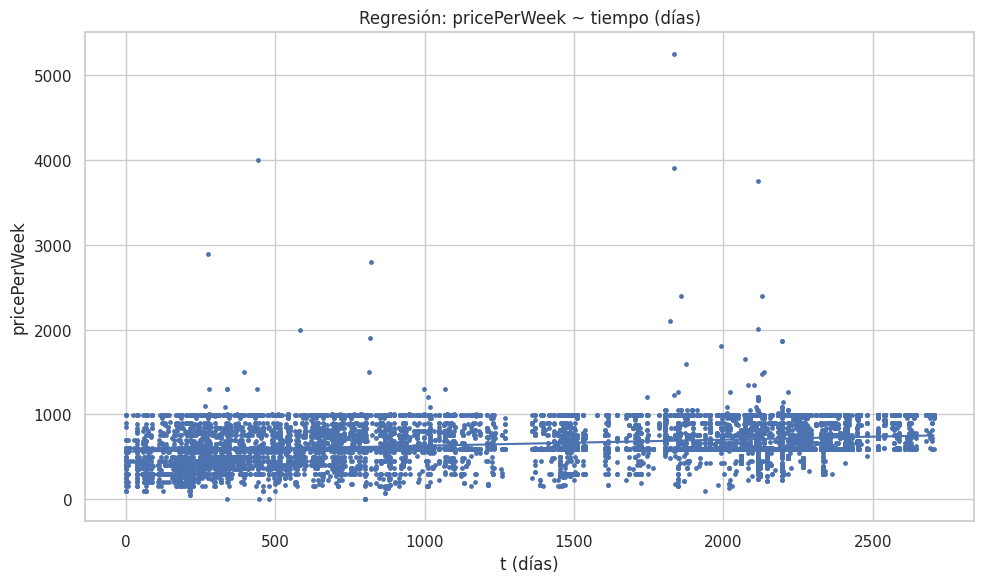

{'variable': 'pricePerWeek', 'beta_0': 557.3542586529476, 'beta_1': 0.0712284615533058, 'R2': 0.06709369318442615}


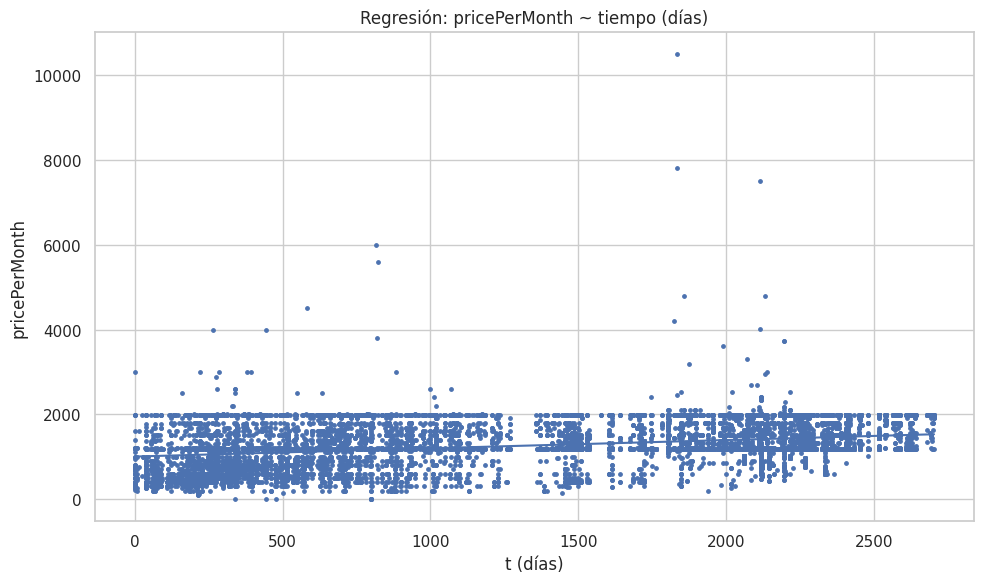

{'variable': 'pricePerMonth', 'beta_0': 1001.6905829640682, 'beta_1': 0.19465823546111588, 'R2': 0.10790780671031919}


In [ ]:
# 7) Regresión lineal simple: precio ~ tiempo (timeCreated como predictor)
# Idea: medir si los precios cambian en función de la antigüedad (días desde el primer registro)

# 7.1) Filtrar filas con fecha válida y construir variable t_dias (días desde la fecha mínima)
df_reg = df.dropna(subset=['timeCreated']).copy()
if not df_reg.empty:
    # Orden cronológico para evitar problemas de cálculo temporal
    df_reg = df_reg.sort_values('timeCreated')

    # t_dias = diferencia de cada fecha con respecto al inicio de la serie (en días)
    df_reg['t_dias'] = (df_reg['timeCreated'] - df_reg['timeCreated'].min()).dt.total_seconds() / (3600 * 24)

    # 7.2) Ajuste lineal por cada variable de precio requerida por la pauta
    for col in [c for c in ['retailPrice', 'pricePerWeek', 'pricePerMonth'] if c in df_reg.columns]:
        # x = tiempo en días; y = precio numérico (forzamos a numérico y quitamos NaN)
        x = df_reg['t_dias'].to_numpy()
        y = pd.to_numeric(df_reg[col], errors='coerce').to_numpy()
        ok = ~np.isnan(y)
        x, y = x[ok], y[ok]

        # Se necesita al menos 2 puntos para ajustar una recta
        if len(x) > 1 and len(y) > 1:
            # polyfit grado 1 devuelve [pendiente, intercepto] para y = b1*x + b0
            b1, b0 = np.polyfit(x, y, 1)

            # Predicciones del modelo lineal
            yhat = b1 * x + b0

            # Cálculo manual de R^2 = 1 - (SS_res / SS_tot)
            ss_res = ((y - yhat) ** 2).sum()
            ss_tot = ((y - y.mean()) ** 2).sum()
            r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan

            # 7.3) Gráfico: dispersión de puntos y línea de regresión
            plt.figure()
            plt.scatter(x, y, s=6)         # nube de puntos (precio vs tiempo)
            plt.plot(x, yhat)              # línea ajustada
            plt.title(f"Regresión: {col} ~ tiempo (días)")
            plt.xlabel("t (días)")         # variable predictora (tiempo)
            plt.ylabel(col)                # variable respuesta (precio)
            plt.tight_layout()
            plt.show()

            # 7.4) Parámetros del modelo para reporte en consola (exigido por la pauta)
            print({
                'variable': col,
                'beta_0': float(b0),       # intercepto: precio esperado en el día 0
                'beta_1': float(b1),       # pendiente: cambio de precio por día
                'R2': float(r2)            # proporción de varianza explicada por el tiempo
            })
        else:
            # Mensaje claro cuando no hay datos suficientes tras limpiar NaN
            print(f"Datos insuficientes para {col}.")
else:
    # Si no existe timeCreated válido, no se puede cumplir la parte de regresión con tiempo
    print("No hay timeCreated válido para regresión.")


**Análisis de regresión (tiempo como predictor)**

**1) retailPrice ~ t_días**

Pendiente (β₁ ≈ -0.56): indica una tendencia levemente decreciente: ~−205 unidades por año (−0.56 × 365).

Intercepto (β₀ ≈ 3631): precio esperado en el inicio de la serie (día 0).

R² ≈ 0.02 (2%): el tiempo explica muy poca variación del precio de venta.

**Lectura visual: nube muy dispersa y muchos outliers (puntos extremos hasta ~80.000), lo que diluye cualquier relación lineal.**

**Conclusión parcial: hay una ligera tendencia a la baja en el precio de lista, pero es débil y está fuertemente afectada por variabilidad y valores extremos.**



---



**2) pricePerWeek ~ t_días**

Pendiente (β₁ ≈ +0.071): aumento leve de ~+26 unidades por año.

Intercepto (β₀ ≈ 557).

R² ≈ 0.067 (6.7%): el tiempo explica algo más que en retailPrice, pero sigue siendo bajo.

**Lectura visual: la nube está más “compacta” entre 400–1000, con algunos picos aislados (hasta ~5.000).**

**Conclusión parcial: se observa suavemente una subida en el precio semanal con el tiempo, pero la capacidad explicativa sigue siendo limitada.**


---



**3) pricePerMonth ~ t_días**

Pendiente (β₁ ≈ +0.195): incremento moderado de ~+71 unidades por año.

Intercepto (β₀ ≈ 1002).

R² ≈ 0.108 (10.8%): es el mejor ajuste de los tres, aunque todavía modesto.

**Lectura visual: tendencia positiva más visible, pero con heterocedasticidad (dispersión desigual) y outliers altos (hasta ~10.500).**

**Conclusión parcial: el precio mensual muestra la tendencia temporal más clara, aunque el tiempo por sí solo no explica la mayor parte de la variación.**



---



**# 8. Resultados**


---


- Estadísticos completos reportados para variables de precio.
- Histogramas y boxplots generados para cada variable de precio.
- Regresiones precio~tiempo con parámetros (β₀, β₁) y R² mostrados en consola y gráficos.

**# 9. Conclusiones**


---


En el dataset outfits.csv (≈15,6k registros; 2016–2024) observamos que los precios presentan alta dispersión y asimetría, con outliers evidentes en los boxplots y un coeficiente de variación elevado (p.ej., retailPrice ≈ 1,05), lo que indica que la variabilidad interna es grande. Los histogramas muestran colas largas y concentración en rangos medios-bajos, mientras que la regresión con el tiempo (timeCreated) arroja relaciones débiles (R² < 0,1) y pendientes pequeñas (ligeramente negativa en retailPrice y apenas positiva en pricePerWeek), es decir: no hay evidencia de una tendencia temporal fuerte; el “spoiler” es que el precio no sube ni baja de forma sistemática por el solo paso del tiempo. En cambio, la heterogeneidad entre descriptores (p. ej., group, tag_categories, owner) parece explicar mejor las diferencias de precio, sugiriendo que el mix de productos/segmentos manda más que la fecha de alta. Por lo tanto, para mejorar el poder explicativo, se recomienda (i) limpiar outliers con reglas por percentiles/IQR, (ii) segmentar y comparar medianas por categoría o marca (ANOVA/OLS con dummies), y (iii) ajustar por factores externos (IPC/moneda si aplica) antes de concluir sobre tendencias. En síntesis, la señal temporal es débil y la variabilidad está impulsada por el tipo de prenda y su segmento; la siguiente iteración debería enfocarse en modelos por segmento y control de outliers para obtener inferencias más estables.

**# 10. Referencias**


---


Borgersen, K. A. K. (2024). Vibrent Clothes Rental Dataset. Kaggle. https://www.kaggle.com/datasets/kaborg15/vibrent-clothes-rental-dataset